[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17135\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\17135\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17135\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


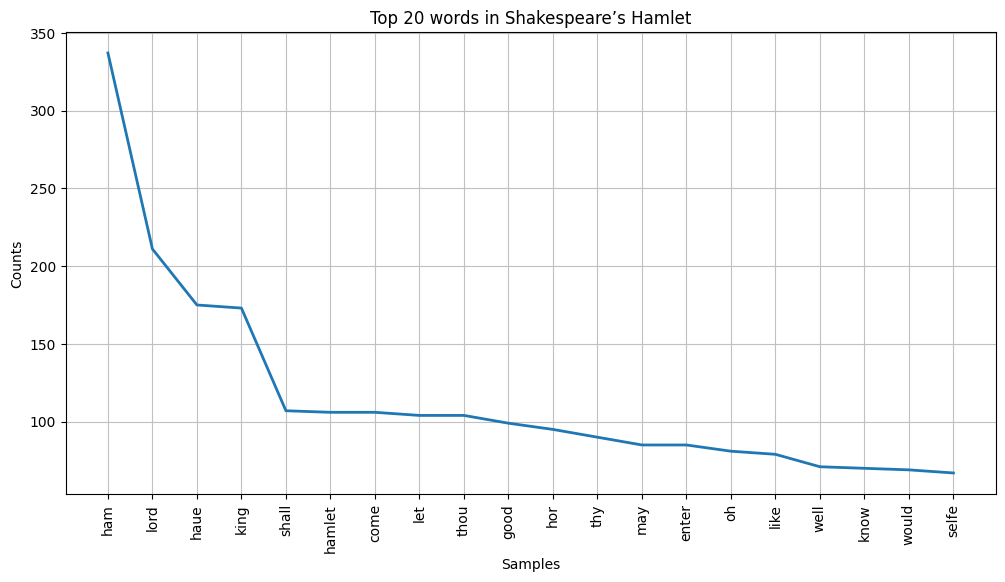

C:\Users\17135\AppData\Local\Temp\ipykernel_32340\2106011554.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


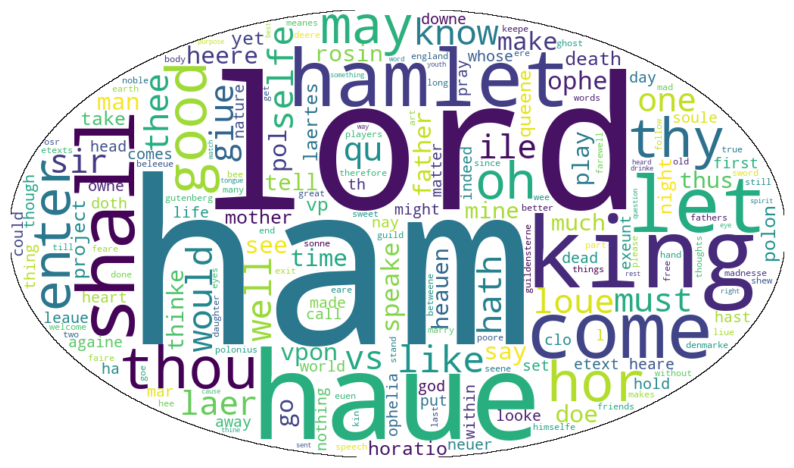

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import requests
import imageio
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Downloading necessary NLTK packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Getting Hamlet text from the provided URL
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

# Using TextBlob
blob = TextBlob(data)

# Preprocessing
words = word_tokenize(blob.string)
clean_words = [word.lower() for word in words if word.isalpha()]  # Only words, no numbers/punctuation
filtered_words = [word for word in clean_words if word not in stopwords.words('english')]

# Getting frequency distribution of the words
freq = nltk.FreqDist(filtered_words)

# Creating a top-20 word frequency bar chart
plt.figure(figsize=(12, 6))
freq.plot(20, title="Top 20 words in Shakespeare’s Hamlet", cumulative=False)
plt.show()

# Creating a word cloud
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

wordcloud = WordCloud(background_color='white', mask=mask_image, contour_width=1, contour_color='black').generate_from_frequencies(freq)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
